<a href="https://colab.research.google.com/github/atharvameshram/ShellAI/blob/main/ShellAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [ ]:
!git clone https://github.com/atharvameshram/ShellAI.git

fatal: destination path 'ShellAI' already exists and is not an empty directory.


In [106]:
from statsmodels.tsa.vector_ar.var_model import VAR
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/train.csv', 
                  parse_dates={'DateTime' : ['DATE (MM/DD)','MST']})

df['DateTime'] = pd.to_datetime(df.DateTime, format='%m/%d %H:%M', 
                                errors='coerce')
df['DateTime'] = df['DateTime'].mask(df['DateTime'].dt.year == 1900, 
                             df['DateTime'] + pd.offsets.DateOffset(year=2000))
df.loc[84960:86399, 'DateTime'] = pd.date_range('2000-02-29', periods=1440, freq='T')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [ ]:
df.iloc[856:861,]

,DateTime,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
856,2000-01-01 14:16:00,131.523,1.52815,212.22747,10.13,2.424,-7.676,25.71,49,3.20,250.3,801.182,0.0,0.284,0.0,0.1718
857,2000-01-01 14:17:00,141.576,4.53003,212.44666,10.04,2.303,-7.897,25.37,-7999,2.45,252.9,801.159,0.0,0.318,0.0,0.1737
858,2000-01-01 14:18:00,151.289,10.00470,212.66538,9.99,2.355,-7.545,26.25,-7999,1.20,263.9,801.148,0.0,0.304,0.0,0.1751
859,2000-01-01 14:19:00,167.359,22.85800,212.88363,9.98,2.262,-8.138,24.94,-7999,0.70,252.7,801.154,0.0,0.312,0.0,0.1774
860,2000-01-01 14:20:00,182.820,51.25000,213.10140,9.99,2.332,-7.868,25.52,65,0.95,126.5,801.182,0.0,0.350,0.0,0.1826


In [70]:
len(list(df.columns))

16

In [71]:
df.dtypes

DateTime                                 datetime64[ns]
Global CMP22 (vent/cor) [W/m^2]                 float64
Direct sNIP [W/m^2]                             float64
Azimuth Angle [degrees]                         float64
Tower Dry Bulb Temp [deg C]                     float64
Tower Wet Bulb Temp [deg C]                     float64
Tower Dew Point Temp [deg C]                    float64
Tower RH [%]                                    float64
Total Cloud Cover [%]                             int64
Peak Wind Speed @ 6ft [m/s]                     float64
Avg Wind Direction @ 6ft [deg from N]           float64
Station Pressure [mBar]                         float64
Precipitation (Accumulated) [mm]                float64
Snow Depth [cm]                                 float64
Moisture                                        float64
Albedo (CMP11)                                  float64
dtype: object

In [ ]:
for i in range(0, len(df)):
  if df['Total Cloud Cover [%]'][i] == -7999:
    k = i
    while df['Total Cloud Cover [%]'][k] == -7999: 
      k += 1
    df['Total Cloud Cover [%]'][i] = df['Total Cloud Cover [%]'][i-1] + (df['Total Cloud Cover [%]'][k]-df['Total Cloud Cover [%]'][i-1])/(k-i+1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.iloc[856:861,]

,DateTime,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
856,2000-01-01 14:16:00,131.523,1.52815,212.22747,10.13,2.424,-7.676,25.71,49,3.20,250.3,801.182,0.0,0.284,0.0,0.1718
857,2000-01-01 14:17:00,141.576,4.53003,212.44666,10.04,2.303,-7.897,25.37,53,2.45,252.9,801.159,0.0,0.318,0.0,0.1737
858,2000-01-01 14:18:00,151.289,10.00470,212.66538,9.99,2.355,-7.545,26.25,57,1.20,263.9,801.148,0.0,0.304,0.0,0.1751
859,2000-01-01 14:19:00,167.359,22.85800,212.88363,9.98,2.262,-8.138,24.94,61,0.70,252.7,801.154,0.0,0.312,0.0,0.1774
860,2000-01-01 14:20:00,182.820,51.25000,213.10140,9.99,2.332,-7.868,25.52,65,0.95,126.5,801.182,0.0,0.350,0.0,0.1826


In [ ]:
df['Total Cloud Cover [%]'][468]

8

In [ ]:
cc = df['Total Cloud Cover [%]'][468:468+360]
time = df['DateTime'][468:468+360]

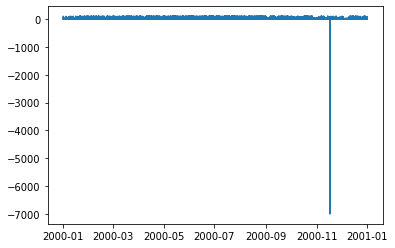

In [69]:
plt.plot(df['DateTime'], df['Total Cloud Cover [%]'])

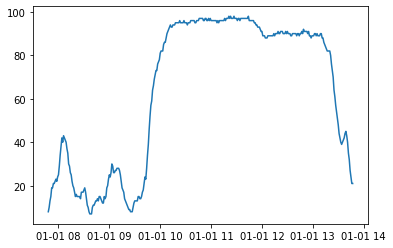

In [ ]:
plt.plot(time, cc)

In [65]:
data = df.drop(df[df['Total Cloud Cover [%]'] < 0].index)
data.head()

,DateTime,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
467,2000-01-01 07:47:00,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6,0.7,210.3,802.042,0.0,0.032,0.0,0.1951
468,2000-01-01 07:48:00,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8,0.7,232.2,801.948,0.0,0.029,0.0,0.1867
469,2000-01-01 07:49:00,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10,1.7,263.9,801.940,0.0,0.173,0.0,0.1783
470,2000-01-01 07:50:00,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.2,277.5,801.927,0.0,0.144,0.0,0.1758
471,2000-01-01 07:51:00,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15,2.2,233.4,801.829,0.0,0.355,0.0,0.1765


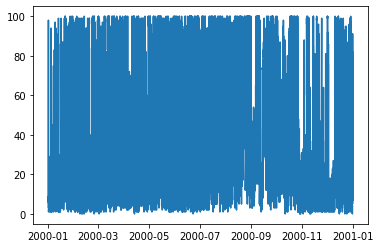

In [66]:
plt.plot(data['DateTime'], data['Total Cloud Cover [%]'])

In [67]:
data[data['Total Cloud Cover [%]'] < 0].index

Int64Index([], dtype='int64')

In [68]:
df.iloc[462702:462708,]

,DateTime,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
462702,2000-11-17 07:42:00,168.601,664.154,123.47553,12.04,2.934,-10.166,18.18,-1400,1.95,264.4,823.656,0.0,-0.034,0.0,0.3000
462703,2000-11-17 07:43:00,165.937,623.221,123.65092,12.12,2.944,-10.256,17.94,-2799,2.45,259.9,823.681,0.0,-0.022,0.0,0.2952
462704,2000-11-17 07:44:00,165.856,601.934,123.82669,12.20,3.003,-10.097,18.10,-4199,2.70,259.8,823.704,0.0,-0.047,0.0,0.2919
462705,2000-11-17 07:45:00,162.967,562.023,124.00283,12.27,3.100,-9.800,18.50,-5599,1.70,262.4,823.706,0.0,-0.094,0.0,0.2859
462706,2000-11-17 07:46:00,162.436,540.855,124.17935,12.28,3.143,-9.557,18.89,-6999,1.45,260.2,823.709,0.0,-0.121,0.0,0.2824
462707,2000-11-17 07:47:00,165.610,546.563,124.35625,12.28,3.141,-9.659,18.72,-6999,1.45,273.6,823.702,0.0,-0.071,0.0,0.2829


In [80]:
data.index = data['DateTime']
data = data.drop(['DateTime', 'Moisture', 'Precipitation (Accumulated) [mm]'], axis=1)

In [82]:
data.head()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Snow Depth [cm],Albedo (CMP11)
DateTime,,,,,,,,,,,,,
2000-01-01 07:47:00,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6,0.7,210.3,802.042,0.032,0.1951
2000-01-01 07:48:00,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8,0.7,232.2,801.948,0.029,0.1867
2000-01-01 07:49:00,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10,1.7,263.9,801.940,0.173,0.1783
2000-01-01 07:50:00,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.2,277.5,801.927,0.144,0.1758
2000-01-01 07:51:00,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15,2.2,233.4,801.829,0.355,0.1765


In [85]:
data[data['Snow Depth [cm]'] < 0].index

DatetimeIndex(['2000-01-01 09:32:00', '2000-01-01 09:43:00',
               '2000-01-01 09:44:00', '2000-01-01 09:48:00',
               '2000-01-02 10:02:00', '2000-01-02 10:03:00',
               '2000-01-02 10:15:00', '2000-01-02 10:16:00',
               '2000-01-02 10:17:00', '2000-01-02 10:18:00',
               ...
               '2000-12-23 09:05:00', '2000-12-23 09:08:00',
               '2000-12-23 09:13:00', '2000-12-23 09:15:00',
               '2000-12-23 09:16:00', '2000-12-23 09:20:00',
               '2000-12-23 09:24:00', '2000-12-25 10:13:00',
               '2000-12-25 10:14:00', '2000-12-26 07:50:00'],
              dtype='datetime64[ns]', name='DateTime', length=37303, freq=None)

In [87]:
len(list(data.columns))

12

In [86]:
data = data.drop(['Snow Depth [cm]'], axis=1)]

In [89]:
coint_johansen(data,-1,1).eig

array([6.73548823e-02, 4.51479149e-02, 2.90774266e-02, 1.28997440e-02,
       8.42604403e-03, 3.97454595e-03, 3.41935233e-03, 2.05369171e-03,
       1.18580306e-03, 9.27750103e-04, 3.33636272e-04, 3.33106035e-08])

In [107]:
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [108]:
model = VAR(endog=train)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [133]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))
prediction

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[3.67412495e+01, 3.98112663e+01, 2.33668184e+02, ...,
        4.34651570e+01, 8.12721445e+02, 2.50162845e-01],
       [5.81902518e+01, 7.73297111e+01, 2.30685548e+02, ...,
        6.19151113e+01, 8.12746257e+02, 2.56244212e-01],
       [7.82095656e+01, 1.12537590e+02, 2.27833627e+02, ...,
        7.66280739e+01, 8.12769650e+02, 2.62056044e-01],
       ...,
       [4.12837602e+02, 4.93677186e+02, 1.80410630e+02, ...,
        1.34688715e+02, 8.16892936e+02, 2.65512443e-01],
       [4.12837602e+02, 4.93677186e+02, 1.80410630e+02, ...,
        1.34688715e+02, 8.16892936e+02, 2.65512443e-01],
       [4.12837602e+02, 4.93677186e+02, 1.80410630e+02, ...,
        1.34688715e+02, 8.16892936e+02, 2.65512443e-01]])

In [110]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0, len(prediction)),columns = data.columns)
for j in range(0, 12):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [111]:
#check rmse
from sklearn.metrics import mean_squared_error
from numpy import sqrt

for i in data.columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Global CMP22 (vent/cor) [W/m^2] is :  230.33750252619703
rmse value for Direct sNIP [W/m^2] is :  401.3945859311042
rmse value for Azimuth Angle [degrees] is :  41.02956430039654
rmse value for Tower Dry Bulb Temp [deg C] is :  11.486145456070249
rmse value for Tower Wet Bulb Temp [deg C] is :  7.564639309338047
rmse value for Tower Dew Point Temp [deg C] is :  8.472010491201672
rmse value for Tower RH [%] is :  23.50179694895397
rmse value for Total Cloud Cover [%] is :  36.313451043948035
rmse value for Peak Wind Speed @ 6ft [m/s] is :  2.2556310945291
rmse value for Avg Wind Direction @ 6ft [deg from N] is :  104.35865324685417
rmse value for Station Pressure [mBar] is :  5.423118755655057
rmse value for Albedo (CMP11) is :  0.20107052594521513


In [132]:
# Make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[[ 3.67412495e+01  3.98112663e+01  2.33668184e+02  2.05142774e+00
  -1.76987783e+00 -7.61582133e+00  4.50799226e+01  7.25566387e+00
   2.24578302e+00  4.34651570e+01  8.12721445e+02  2.50162845e-01]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [134]:
def get_pred(test_df):
  model = VAR(endog=train+test_df)
  model_fit = model.fit()

  prediction = model_fit.forecast(model_fit.y, steps=len(valid))
  return prediction

In [117]:
path = '/content/ShellAI/test/'

In [152]:
for i in range(1, 2):
  new_path = path + str(i) + '/weather_data.csv'
  test_df = pd.read_csv(new_path)
  
  test_df.index = test_df['Time [Mins]']
  test_df = test_df.drop(['Time [Mins]', 'Moisture', 'Precipitation (Accumulated) [mm]'], axis=1)
  test_df = test_df.drop(test_df[test_df['Total Cloud Cover [%]'] < 0].index)

  dataset = pd.concat([train, test_df], axis=0)

  model = VAR(endog=test_df)
  model_fit = model.fit()

  prediction = model_fit.forecast(model_fit.y, steps=120)
  
  pred = pd.DataFrame(index=range(0, len(prediction)),columns = data.columns)
  for j in range(0, 12):
      for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

  print(pred['Total Cloud Cover [%]'])
  # pred = get_pred(test_df)

0      98.9301
1      98.9053
2       98.903
3      98.9028
4      98.8979
        ...   
115    76.3979
116    76.0081
117    75.6143
118    75.2163
119    74.8141
Name: Total Cloud Cover [%], Length: 120, dtype: object


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
